# **Telco Churn Analysis**


# Project Overview

I am analyzing the Telco Churn data to identify key drivers for customer churn and develop predictive models to accurately forecast churn, giving insights into potential customer retention strategies.

## Project Goals

- Determine the main drivers contributing to customer churn
- Use drivers to develop a machine learning model that identifies customers likely to churn
- This information could be used to create actionable recommendations to reduce churn

## Imports

In [1]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


#stats is great
from scipy import stats

#modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#evaulation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#my own files with my own functions
import acquire
import prepare
import os

## Acquiring the data

- Data was acquired on December 1st, 2023 from the MySQL "telco_churn" database hosted on our codeup server
- Specifically, the "customers", "contract_types", "internet_service_types", and "payment_types" tables
- The data contained 7,043 rows and 24 columns before cleaning
- Each row represents a customer 
- Each column represents data about that customer

In [2]:
# Import acquired messy data from your acquire file here
df = acquire.get_telco_data()
df.head(3)

this file exists, reading csv


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


## Prepare

**Prepare Actions:**

- Removed redundant columns
- Checked for null values
- Checked for duplicate rows
- Removed whitespace from values in "total_charges" column
- Checked that column data types were appropriate
- Outliers have not been removed for this iteration of the project

In [3]:
# acquiring and cleaning the data
df = prepare.prep_telco(df)
# splitting data into train, validate, and test
train, validate, test = prepare.splitting_data(df, 'churn')

## A brief look at the data

In [4]:
train.head() #head of train data

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,4083-BFNYK,Female,1,Yes,No,38,Yes,Yes,Yes,Yes,...,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,5804-LEPIM,Female,1,No,No,2,Yes,No,No,No,...,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,NaN,Mailed check
923,1342-JPNKI,Male,0,No,No,10,Yes,Yes,No,No,...,No,Yes,No,Yes,86.05,834.1,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,3397-AVTKU,Male,0,No,No,43,Yes,No,No,Yes,...,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


### The column names and number of unique values

In [5]:
train.nunique() #unique values amongst each column

customer_id              4225
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     73
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1374
total_charges            4006
churn                       2
contract_type               3
internet_service_type       2
payment_type                4
dtype: int64

## Explore

### Distribution of Contract Type and Tech Support

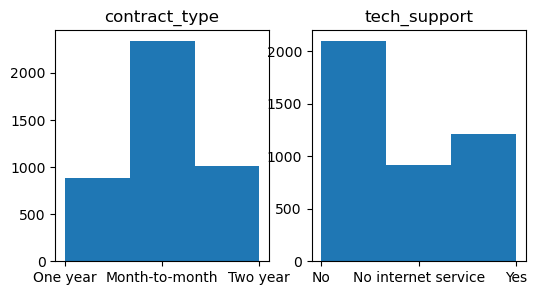

In [6]:
plt.figure(figsize=(16, 3))
cols = ['contract_type', 'tech_support'] # List of columns
for i, col in enumerate(cols):
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    plt.subplot(1,5, plot_number) # Create subplot.
    plt.title(col) # Title with column name.
    train[col].hist(bins=3) # Display histogram for column.
    plt.grid(False) # Hide gridlines.

### Distribution of Tenure

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


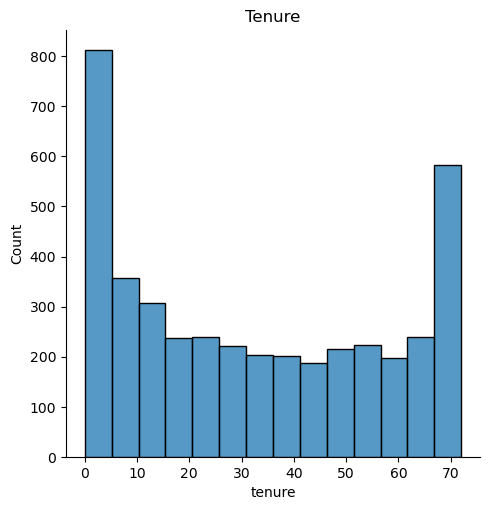

In [7]:
sns.displot(x='tenure', data=train) #plot distribution of tenure
warnings.filterwarnings("ignore")
plt.title('Tenure') 
plt.show()

### Distribution of Monthly Charges

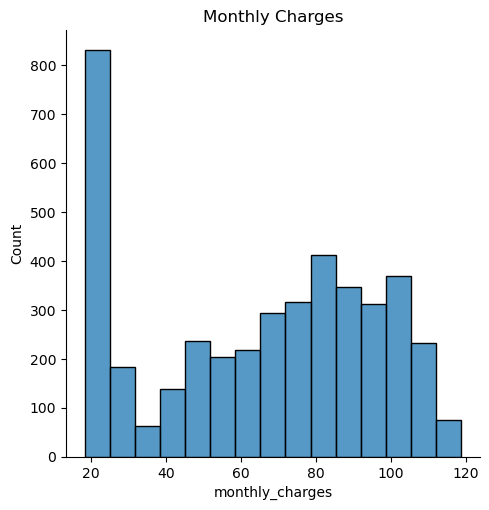

In [8]:
sns.displot(x='monthly_charges', data=train) #plot distribution of monthly charges
warnings.filterwarnings("ignore")
plt.title('Monthly Charges')
plt.show()

### Does length of tenure effect churn?

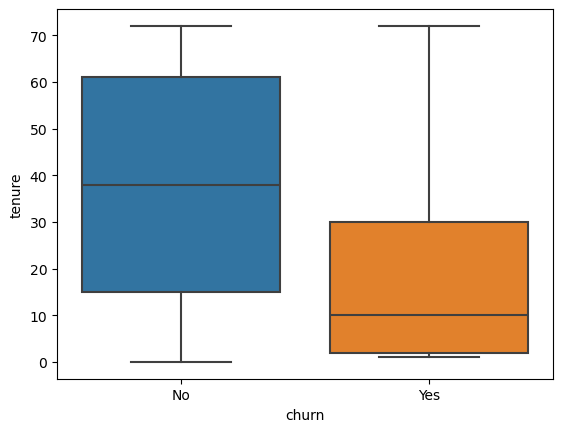

In [9]:
sns.boxplot(x='churn', y='tenure', data=train) # boxplot of tenure between churn and no churn
plt.show()

#### Using statistics we will investigate further into whether or not tenure and churn are related

$H_0$: There is no relationship between tenure and churn

$H_a$: There is a relationship between tenure and churn

alpha = 0.05

> Check for normality of the tenure data

In [10]:
# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(train.tenure)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the data is normally distributed
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


Shapiro-Wilk Test Statistic: 0.9031785726547241
P-value: 1.401298464324817e-45
The data is not normally distributed.


> The data is not normally distributed so we will use Mann-Whitney U to test for statistical significance 

In [11]:
# Extract the relevant columns
tenure_churned = train[train.churn == 'Yes']['tenure']
tenure_not_churned = train[train.churn == 'No']['tenure']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(tenure_churned, tenure_not_churned)

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the difference in means is statistically significant
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a statistically significant difference in tenure between churned and non-churned groups.")
else:
    print("There is no statistically significant difference in tenure between churned and non-churned groups.")


Mann-Whitney U statistic: 901230.5
P-value: 6.210946074407514e-127
There is a statistically significant difference in tenure between churned and non-churned groups.


> #### We fail to reject the null hypothesis and can conclude that there is a statistically significant difference between the tenure of churned costomers compared to the tenure of customers who did not churn

## Does the type of contract effect churn?

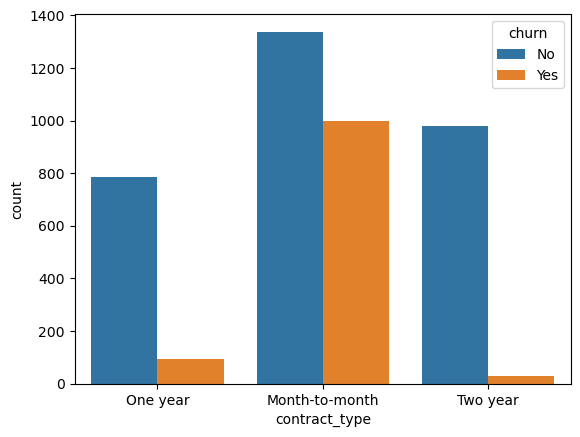

In [12]:
sns.countplot(x='contract_type', hue='churn', data=train) #boxplot of churn amongst different contract types
plt.show()

> #### Customers on a month-to-month contract appear to churn at a significantly higher rate

## Do monthly charges effect churn?

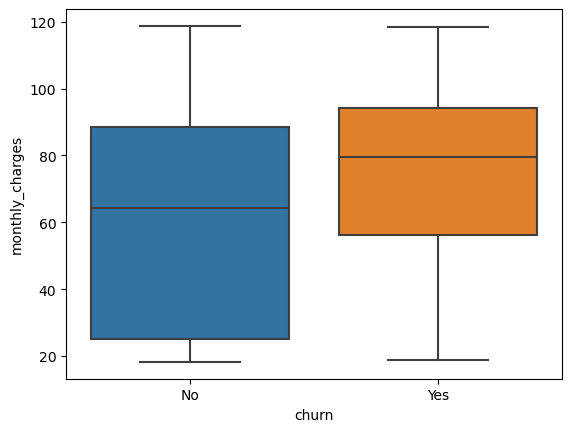

In [13]:
sns.boxplot(x='churn', y='monthly_charges', data=df) #boxplot of monthly charges between churn and no churn
plt.show()

#### Using statistics we will investigate further into whether or not monthly_charges and churn are related

$H_0$: There is no relationship between monthly charges and churn

$H_a$: There is a relationship between monthly charges and churn

alpha = 0.05

> Check for normality of the monthly charges data

In [14]:
# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(train.monthly_charges)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the data is normally distributed
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9185670018196106
P-value: 5.647232811229013e-43
The data is not normally distributed.


> The data is not normally distributed so we will use Mann-Whitney U to test for statistical significance 

In [15]:
# Extract the relevant columns
monthly_charges_churned = train[train.churn == 'Yes']['monthly_charges']
monthly_charges_not_churned = train[train.churn == 'No']['monthly_charges']

# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(monthly_charges_churned, monthly_charges_not_churned)

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the difference in means is statistically significant
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("There is a statistically significant difference in Monthly Charges between churned and non-churned groups.")
else:
    print("There is no statistically significant difference in Monthly Charges between churned and non-churned groups.")

Mann-Whitney U statistic: 2136241.0
P-value: 9.83259830397179e-30
There is a statistically significant difference in Monthly Charges between churned and non-churned groups.


> #### We fail to reject the null hypothesis and can conclude that there is a statistically significant difference between the monthly charges of customers who churned compared to the monthly charges of customers who did not churn

## Does having tech support effect churn?

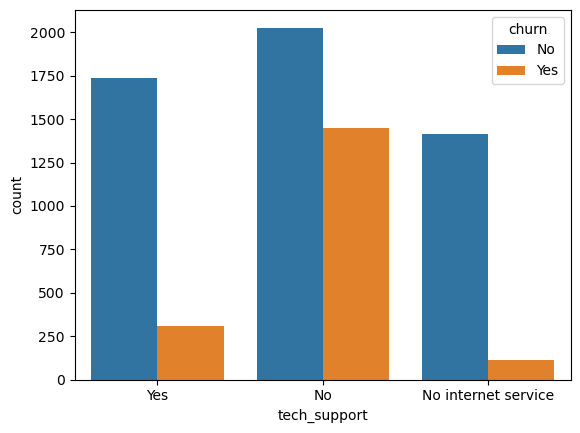

In [16]:
sns.countplot(x='tech_support', hue='churn', data=df) #plot churn amongst tech support feature
plt.show()

> #### Customers with no tech support appear to churn at a significantly higher rate

## Exploration Summary

- "Tenure" was found to be a driver of "Churn"
    - Less tenured customers were more likely to churn
- "Monthly Charges" was found to be a driver of "Churn"
    - Higher monthly charges correlated with higher churn
- "Type of Contract" was found to be a driver of "Churn"
    - Customers on a month-to-month contract were more likely to churn
- "Tech Support" was found to be a driver of "Churn"
    - Customers with no tech support were more likely to churn

## Modeling

- I will use accuracy as my evaluation metric
- Customers who did not churn make up 73.47% of the data
- 73.47% will be the baseline accuracy I use for this project

In [17]:
(train.churn == 'No').mean() #percentage of customers who did not churn

0.7346745562130178

In [18]:
# encoding the data
df_encoded = prepare.encode_telco(df)
# split the data
train, validate, test = prepare.splitting_data(df_encoded, 'churned')

In [19]:
# prepare the data for modeling
X_train = train.drop(columns='churned')
X_validate = validate.drop(columns='churned')
X_test = test.drop(columns='churned')

y_train = train.churned
y_validate = validate.churned
y_test = test.churned

## Decision Tree

In [20]:
#create the object
tree = DecisionTreeClassifier(max_depth=8)
    
#fit the object
tree.fit(X_train, y_train) #fit only on TRAIN DATA!
    
#calculate the accuracy for train
acc = tree.score(X_train, y_train)
    
#calculate the accuracy for validate
acc_v = tree.score(X_validate, y_validate)
    
print(f'With a max depth of 8, train accuracy = {round(acc,2)}, validate accuracy = {round(acc_v,2)}')

With a max depth of 8, train accuracy = 0.82, validate accuracy = 0.79


#### Decision Tree accuracy is better than baseline

## Random Forest

In [21]:
#create the object
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)

#fit the object
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

#calculate the accuracy for train
t_acc = rf.score(X_train, y_train)

#calculate the accuracy for validate
v_acc = rf.score(X_validate, y_validate)
    
print(f'For min leaf samples = 1 and max depth = 10: train accuracy = {round(t_acc,2)}, validate accuracy = {round(v_acc,2)}')

For min leaf samples = 1 and max depth = 10: train accuracy = 0.87, validate accuracy = 0.8


#### Random Forest accuracy is better than baseline

## K-Nearest Neighbors

In [22]:
#create the object
knn = KNeighborsClassifier()

#fit the object
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

#calculate the accuracy for train
t_acc = knn.score(X_train, y_train)

#calculate the accuracy for validate
v_acc = knn.score(X_validate, y_validate)

print(f'For k = 5: train accuracy = {round(t_acc,2)}, validate accuracy = {round(v_acc,2)}')

For k = 5: train accuracy = 0.84, validate accuracy = 0.76


#### KNN accuracy is better than baseline

## Comparing Models

- All models performed better than baseline with Random Forest performing best on the validate data
- I will move forward with the Random Forest model

### Random Forest on Test

In [23]:
#calculate the accuracy for validate
t_acc = rf.score(X_test, y_test)
    
print(f'The accuracy of the Random Forest model on the Test data = {round(t_acc,2)}')

The accuracy of the Random Forest model on the Test data = 0.79


#### Chart visualising how the model performed on Test data

In [24]:
#churned actual = churned
#predicted churn = col_O
y_pred = rf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
churned,,
0,931,104
1,187,187


### Modeling Summary

- The results of the Decision Tree, Random Forest, and KNN models were all very similar and above baseline
- A Random Forest model I selected as the final model had an accuracy of about 79% which is above the baseline accuracy

## Conclusion

- Our original goals were to find drivers of churn and create a model to predict churn
- We were able to determine that tenure, monthly charges, type of contract, and tech support all had a statistically significant correlation with churn
- Using those features we were able to create a machine learning model that accurately predicted churn at a rate above baseline
- Recomendations to minimize churn:
    - Incentivize annual and biennial contract types because the month-to-month contracts had a significantly churn rate
    - Ensure more customers sign up for tech support because customers with tech support churned significantly less
    - Reward new customers for staying with the company because less tenure had a higher rate of churn
    - Help customers keep their monthly payments low because higher monthly payments correlated with higher churn
- If I had more time I would look into isolating a third variable like senior citizen, dependents, or partner. 
- I would also seperate the data of customers who had only internet and customers who had only phone service.
- I would also look more into payment method because it looked like there was a significant correlation between electronic check payment and churn